In [87]:
from vitabel import Vitals, Label
import numpy as np


In [88]:
case = Vitals()
case.load_data("data/usecase_3.json")


In [89]:
old_label = case.get_label("Event")
case.remove_label(label=old_label)


In [90]:
data_dict= {'name': 'Event',
 'time_index': [   0,  450, 2704, 3000,
        9015, 9273, 9330 , 9491],
 'data': None,
 'text_data': ['Patient in Room', 'Anesthesia Start', 'Timeout',
        'Incision', 'Closure', 'Extubation', 'Anaesthesia End',
        'Patient Out of Room'],
 'time_start': '2024-12-24 12:17:00',
 'time_unit': 's',
 'offset': 0.0,
 'is_interval': False,
 'plotstyle': {'marker': 'o', 'ms': 5, 'linestyle': 'none'},
 'metadata': {},
 'plot_type': 'combined',
 'vline_text_source': 'text_data'}


In [91]:
new_label = Label("").from_dict(data_dict)
case.add_global_label(new_label)

In [92]:
case.info()

,Name,Length,First Entry,Last Entry,Offset
0,MAP,300,2024-12-24 12:24:24,2024-12-24 14:53:54,0 days 00:00:00
1,DIA,300,2024-12-24 12:24:24,2024-12-24 14:53:54,0 days 00:00:00
2,SYS,300,2024-12-24 12:24:24,2024-12-24 14:53:54,0 days 00:00:00


,Name,Length,First Entry,Last Entry,Offset
0,Remifentanil,1,2024-12-24 12:42:01.507886041,2024-12-24 14:47:10.070170558,0 days 00:00:00
1,Sevofluran,1,2024-12-24 12:37:32.863636363,2024-12-24 14:48:20.136363636,0 days 00:00:00
2,Medication,14,2024-12-24 12:31:32.409090909,2024-12-24 14:36:55.743100799,0 days 00:00:00
3,Event,8,2024-12-24 12:17:00,2024-12-24 14:55:11,0 days 00:00:00


In [93]:
data_dict={'name': 'Medication',
 'time_index':[   0.        ,  124.09090909,  165.45454545,  762.56157353,
        1270.01381141, 2095.65231736, 2729.28186844, 3128.84336024,
        4116.77514948, 5292.14425181, 5640.96051982, 5894.22947459,
        6400.7673841 , 7523.33400989],
 'data': None,
 'text_data': ['Fentanil', 'Propofol', 'Esmeron', 'Phenylephrin', 'Phenylephrin',
        'Phenylephrin', 'Phenylephrin', 'Phenylephrin', 'Phenylephrin',
        'Phenylephrin', 'Phenylephrin', 'Phenylephrin', 'Phenylephrin',
        'Piritramid'],
 'time_start': '2024-12-24 12:31:32.409090909',
 'time_unit': 's',
 'offset': 0.0,
 'is_interval': False,
 'plotstyle': {'linestyle': '--', 'marker': None, 'color': 'blue'},
 'metadata': {},
 'plot_type': 'combined',
 'vline_text_source': 'text_data'}

In [94]:
old_label = case.get_label("Medication")
case.remove_label(label=old_label)


In [95]:
new_label = Label("").from_dict(data_dict)
case.add_global_label(new_label)


In [96]:
for label_name in ("Analysis","MAP"):
    if label_name in case.get_label_names():
        label=case.get_label(label_name)
        case.remove_label(label=label)

In [97]:
map_dict = case.get_channel("MAP").to_dict()

In [98]:
data = map_dict["data"]
indices = np.arange(len(data))
mask = (indices > 117) & (indices < 125) & (data > 108.5)

In [103]:
data[mask] = -2

In [104]:
case.save_data(case.metadata["filepath"])




(<Figure size 640x480 with 1 Axes>, array([<Axes: >], dtype=object))

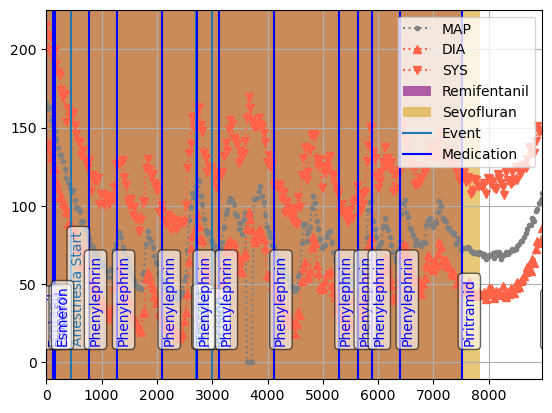

In [102]:
case.plot()